In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)


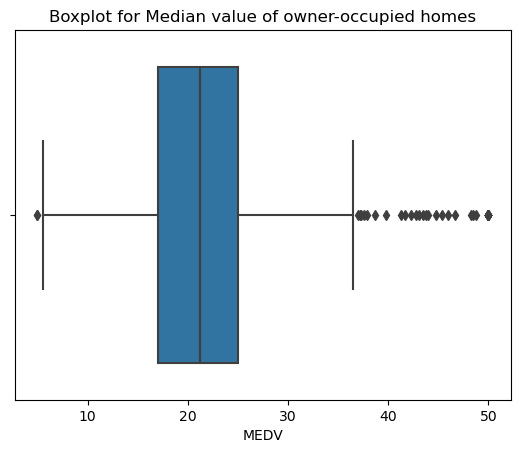

In [152]:
box=sns.boxplot(data=boston_df,x='MEDV')
plt.title("Boxplot for Median value of owner-occupied homes")
box.annotate(text='hello', xy=(20,10), fontsize='45')
plt.show()

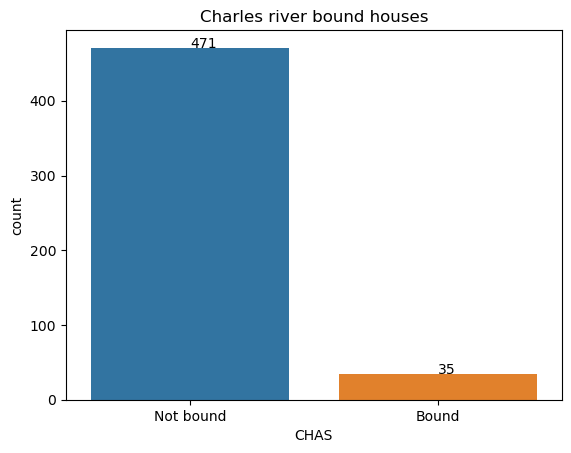

In [166]:

n=sns.countplot(data=boston_df, x='CHAS')
plt.title('Charles river bound houses')
n.set_xticklabels(['Not bound','Bound'])
n.annotate(text=f'{boston_df["CHAS"].value_counts()[0]}',xy=(0,boston_df["CHAS"].value_counts()[0]))
n.annotate(text=f'{boston_df["CHAS"].value_counts()[1]}',xy=(1,boston_df["CHAS"].value_counts()[1]))

plt.show()

In [168]:
n=boston_df[['MEDV','AGE']]
n['Age_group']=n['AGE'].apply(lambda x: '35 or Younger' if x<=35  else 'Between 35 and 70' if (x<70 and x>35) else '70 or Older')


/tmp/wsuser/ipykernel_164/1755965380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['Age_group']=n['AGE'].apply(lambda x: '35 or Younger' if x<=35  else 'Between 35 and 70' if (x<70 and x>35) else '70 or Older')


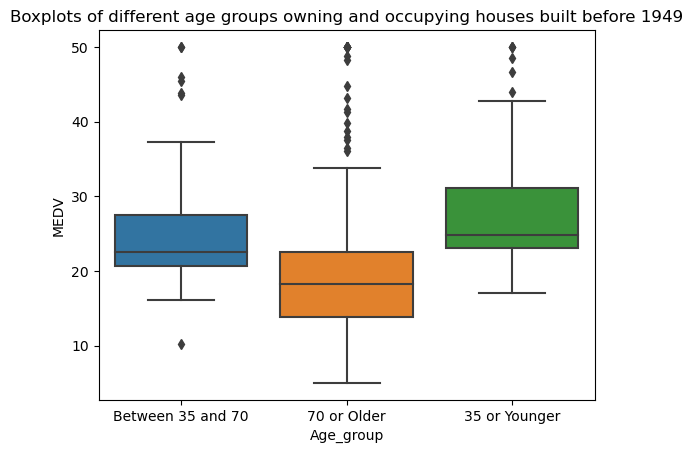

In [185]:
sns.boxplot(data=n, x='Age_group', y='MEDV')
plt.title('Boxplots of different age groups owning and occupying houses built before 1949')
plt.show()

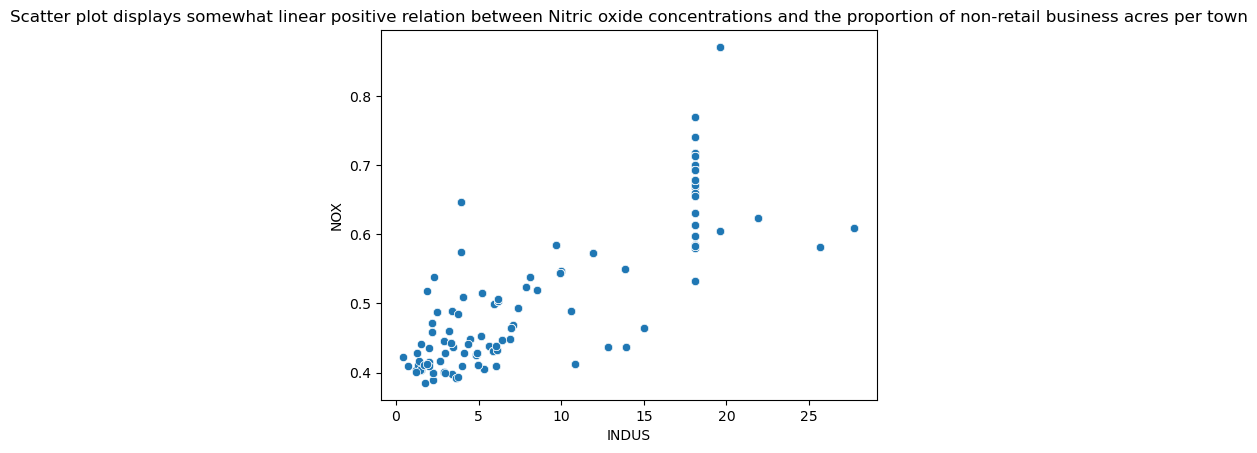

In [88]:
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
plt.title('Scatter plot displays somewhat linear positive relation between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

In [110]:
boston_df['bins']=pd.cut(boston_df["PTRATIO"],3)#.value_counts()



In [192]:
not_bounded=boston_df[boston_df['CHAS']==0.0]['MEDV']
bounded=boston_df[boston_df['CHAS']==1.0]['MEDV']

# BEFORE CARRYING OUT THE T-TEST, WE HAVE TO ENSURE THAT THE VARIANCES ARE EQUAL. FOR THAT, WE PERFORM LEVEN'S TEST.
# OUR NULL HYPOTHESIS IN LEVENE TEST IS THAT VARIANCES ARE EQUAL; THE ALTERNATE HYPOTHESIS IS THAT THEY ARE NOT EQUAL.

print(s.levene(bounded,not_bounded, center="mean"))

# SINCE THE p-value is less than 0.05, therefore equal variances cannot be assumed
# H0: difference btw bounded AND unbounded = 0
# Ha: difference btw bounded AND unbounded != 0

print(s.ttest_ind(bounded, not_bounded, equal_var= False))

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)
Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)


# The p-values calculated as a result of independent t-test is small as compared to out alpha values of 0.05. This tells us that the difference in median values of houses bounded by Charles River and those that aren't is statistically significant 

In [193]:
n=boston_df[['MEDV','AGE']]
n['Age_group']=n['AGE'].apply(lambda x: '35 or Younger' if x<=35  else 'Between 35 and 70' if (x<70 and x>35) else '70 or Older')
g1=n[n['Age_group']=='35 or Younger']['MEDV']
g2=n[n['Age_group']=='Between 35 and 70']['MEDV']
g3=n[n['Age_group']=='70 or Older']['MEDV']

s.levene(g1,g2,g3, center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance
# H0: difference btw the groups = 0
# Ha: difference btw the groups!= 0

s.f_oneway(g1, g2, g3)
# A P-VALUES SMALLER THAN 0.05 TELLS US THERE IS A SIGNIFICAT DIFFERENCE BETWEEN ATLEAST ONE OF THE AGE GROUPS' VALUES

/tmp/wsuser/ipykernel_164/1923660068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['Age_group']=n['AGE'].apply(lambda x: '35 or Younger' if x<=35  else 'Between 35 and 70' if (x<70 and x>35) else '70 or Older')


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

# A P-VALUES SMALLER THAN 0.05 TELLS US THERE IS A SIGNIFICAT DIFFERENCE BETWEEN ATLEAST ONE OF THE AGE GROUPS' VALUES

# -------------------------------------------------------------------------------------------------------------------

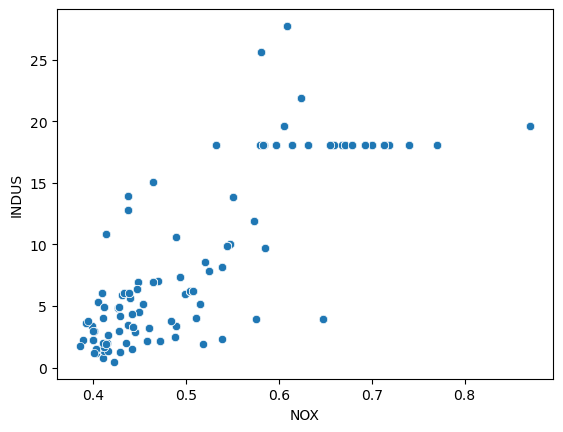

(0.7636514469209151, 7.913361061238693e-98)

In [127]:
nox=boston_df['NOX']
indus=boston_df['INDUS']

sns.scatterplot(data=boston_df, x='NOX',y='INDUS')
plt.show()

# THE ALTERNATE HYPOTHESIS IS THAT THERE IS A CORRELATION BETWEEN THE TWO VARIABLES, AS AGAINST THE NULL HYPOTHESIS WHICH SAYS THERE IS NOT.

s.pearsonr(nox,indus)

# The p-value is very low, signaling a statistically significant relation between the variables

# -------------------------------------------------------------------------------------------------------------------

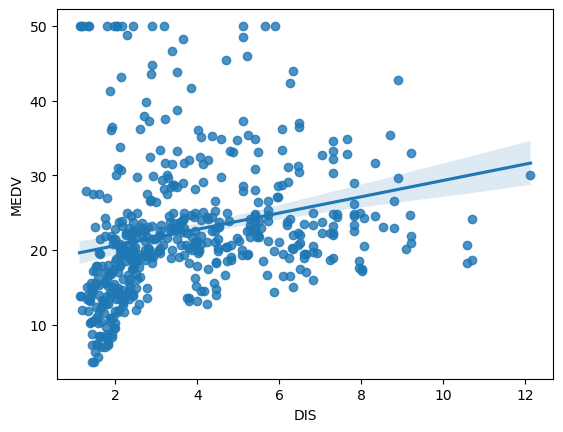

In [130]:
sns.regplot(data=boston_df, x='DIS',y='MEDV')
plt.show()

In [ ]:
# THE ALTERNATE HYPOTHESIS IS THAT THERE IS A CORRELATION BETWEEN THE TWO VARIABLES, AS AGAINST THE NULL HYPOTHESIS WHICH SAYS THERE IS NOT.


In [132]:
X=boston_df['DIS']
y=boston_df['MEDV']

X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
prediction=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        20:06:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# For every 1 unit increase in 'DIS' , we can expect an increase of 1091 dollars in median value

# -------------------------------------------------------------------------------------------------------------------